In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [88]:
## 메인데이터
df_food = pd.read_csv('./dataset/cat/식료품구매금액.csv',encoding = 'cp949')
df_food=df_food.reset_index()
df_food.columns=['고객번호','식료품_1Q','식료품_2Q','식료품_3Q','식료품_4Q','식료품_5Q','식료품_6Q','식료품_7Q','식료품_8Q']
df_food

,고객번호,식료품_1Q,식료품_2Q,식료품_3Q,식료품_4Q,식료품_5Q,식료품_6Q,식료품_7Q,식료품_8Q
0,0,635666.0,995603.0,889163.0,1579134.0,1481879.0,1085088.0,570742.0,284778.0
1,1,2455558.0,2030956.0,1652569.0,1511411.0,1874481.0,965639.0,1319363.0,1149868.0
2,2,142184.0,316266.0,486706.0,191094.0,170284.0,198980.0,346174.0,183260.0
3,3,566579.0,893745.0,398993.0,288153.0,754249.0,730851.0,622233.0,396264.0
4,4,1321780.0,1258834.0,834808.0,229015.0,688662.0,256589.0,NaN,556818.0
...,...,...,...,...,...,...,...,...,...
19367,19367,NaN,NaN,22595.0,95546.0,111095.0,110589.0,94170.0,72374.0
19368,19368,NaN,NaN,NaN,14899.0,125099.0,45489.0,108496.0,299238.0
19369,19369,NaN,NaN,NaN,NaN,621103.0,1493127.0,1214638.0,729185.0
19370,19370,NaN,NaN,NaN,NaN,575658.0,808235.0,1019750.0,824414.0


In [91]:
df_food.고객번호=df_food.고객번호.apply(lambda x:x+1)

In [92]:
df_food

,고객번호,식료품_1Q,식료품_2Q,식료품_3Q,식료품_4Q,식료품_5Q,식료품_6Q,식료품_7Q,식료품_8Q
0,1,635666.0,995603.0,889163.0,1579134.0,1481879.0,1085088.0,570742.0,284778.0
1,2,2455558.0,2030956.0,1652569.0,1511411.0,1874481.0,965639.0,1319363.0,1149868.0
2,3,142184.0,316266.0,486706.0,191094.0,170284.0,198980.0,346174.0,183260.0
3,4,566579.0,893745.0,398993.0,288153.0,754249.0,730851.0,622233.0,396264.0
4,5,1321780.0,1258834.0,834808.0,229015.0,688662.0,256589.0,NaN,556818.0
...,...,...,...,...,...,...,...,...,...
19367,19368,NaN,NaN,22595.0,95546.0,111095.0,110589.0,94170.0,72374.0
19368,19369,NaN,NaN,NaN,14899.0,125099.0,45489.0,108496.0,299238.0
19369,19370,NaN,NaN,NaN,NaN,621103.0,1493127.0,1214638.0,729185.0
19370,19371,NaN,NaN,NaN,NaN,575658.0,808235.0,1019750.0,824414.0


In [13]:
## 기존고객데이터
df_ex = pd.read_csv('ex_cust.csv',encoding = 'utf-8-sig')
df_ex=df_ex[['Unnamed: 0']]
df_ex.columns=['고객번호']
df_ex

,고객번호
0,1
1,2
2,3
3,4
4,6
...,...
18861,19333
18862,19334
18863,19335
18864,19336


In [93]:
# pd.merge(df_food,df_ex, how='inner', left_on='고객번호', right_on='기존고객번호')
df_ex_food=pd.merge(df_food,df_ex, how='inner', on='고객번호')

In [75]:
a=df_ex_food.sum()[1:]
a
# b=[]
# for i in a:
#     b.append(i)
# b=pd.DataFrame(b)
# b_x=b.index
# b_y=b[0]
# sns.barplot(x=b_x,y=b_y)

식료품_1Q    1.678890e+10
식료품_2Q    1.732952e+10
식료품_3Q    2.070951e+10
식료품_4Q    1.409319e+10
식료품_5Q    1.823550e+10
식료품_6Q    1.733499e+10
식료품_7Q    2.080155e+10
식료품_8Q    1.251125e+10
dtype: float64

<AxesSubplot:ylabel='0'>

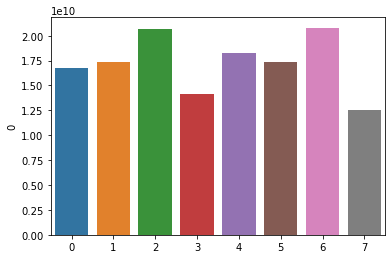

In [37]:
import seaborn as sns
b=pd.DataFrame(b)
b_x=b.index
b_y=b[0]
sns.barplot(x=b_x,y=b_y)

In [144]:
def data_cat(x,y):
    df = pd.read_csv(x,encoding = 'cp949')
    df=df.reset_index()
    df_c=['고객번호']
    for i in range(1,9):
        t= y+str(i)
        df_c.append(t)
    df.columns=df_c
    df.고객번호=df.고객번호.apply(lambda x:x+1)
    df_main_n=pd.merge(df,df_ex, how='inner', on='고객번호')
    df_main_n.fillna(0,inplace=True)
    return df_main_n

In [136]:
def data_cat2(x,y):
    df = pd.read_csv(x,encoding = 'cp949')
    df=df.reset_index()
    df_c=['고객번호']
    for i in range(1,9):
        t= y+str(i)
        df_c.append(t)
    df.columns=df_c
    df.고객번호=df.고객번호.apply(lambda x:x+1)
    df_main_n=pd.merge(df,df_ex, how='inner', on='고객번호')
    df_main_n.fillna(0,inplace=True)
    quar_sales=df_main_n.sum()[1:]
    b=[]
    for i in quar_sales:
        b.append(i)
    b=pd.DataFrame(b)
    b_x=df_main_n.columns[1:]
    b_y=b[0]
    display(sns.barplot(x=b_x,y=b_y))
    return df_main_n

In [100]:
plt.rc('font', family='NanumGothic')
li=['식료품','의류잡화','생활잡화','레저취미','전자제품','문구류','기타','화장품','가구','기호품','차량용품','고급식료품','도서음반','사치품']

<AxesSubplot:ylabel='0'>

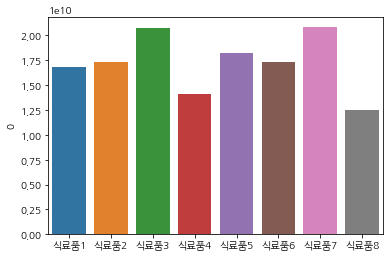

In [101]:
text=li[0]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

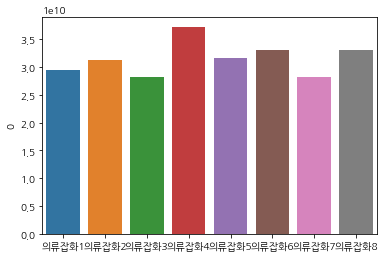

In [102]:
text=li[1]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

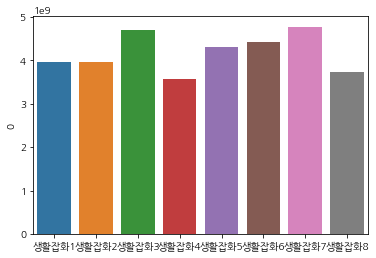

In [103]:
text=li[2]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

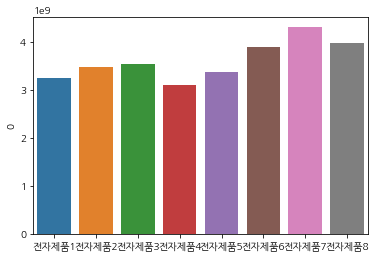

In [64]:
text=li[4]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

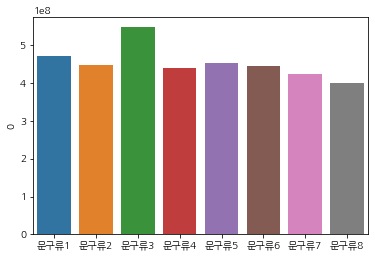

In [66]:
text=li[5]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

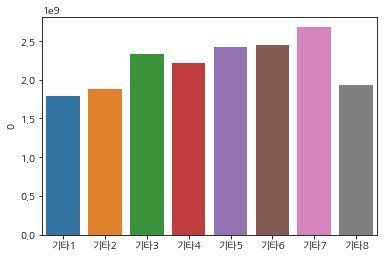

In [67]:
text=li[6]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

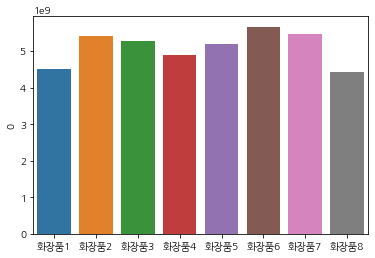

In [68]:
text=li[7]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

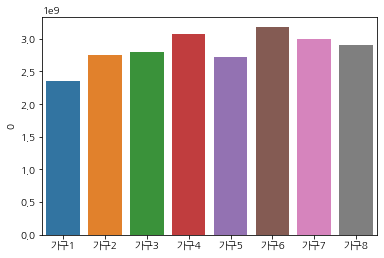

In [69]:
text=li[8]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

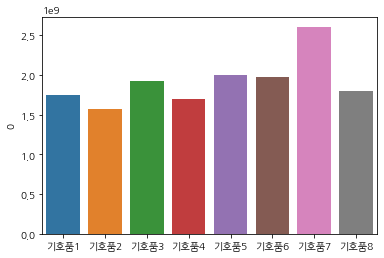

In [70]:
text=li[9]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

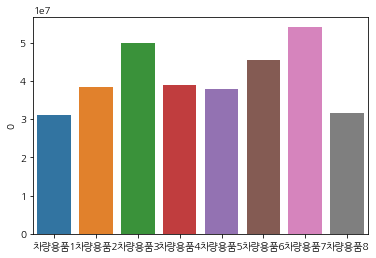

In [71]:
text=li[10]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

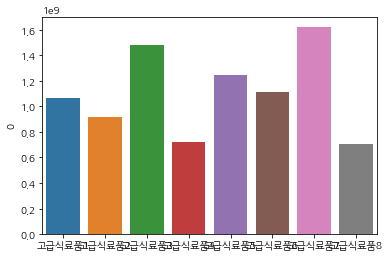

In [72]:
text=li[11]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

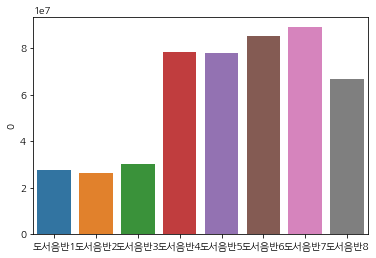

In [73]:
text=li[12]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

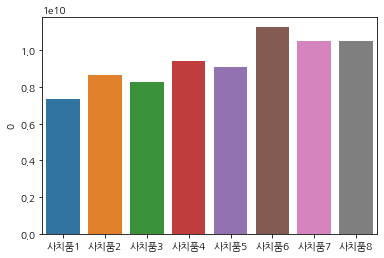

In [74]:
text=li[13]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

<AxesSubplot:ylabel='0'>

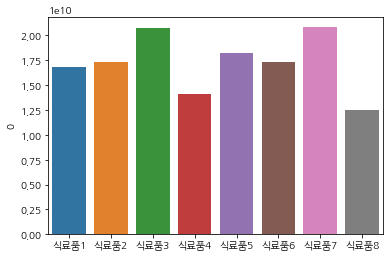

In [140]:
text=li[0]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat2(link,text)

In [141]:
asa = df_main.iloc[:,1:-1].describe()
print((asa.loc['25%'].sum())/7)
print((asa.loc['50%'].sum())/7)
print((asa.loc['75%'].sum())/7)

428188.5
737982.7857142857
1119195.2857142857
379308711.28571427


In [ ]:
#식료품등급
text=li[1]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat(link,text)
df_main

In [145]:
text=li[1]
link= './dataset/cat/'+ text +'구매금액.csv'
df_main=data_cat(link,text)
df_main

,고객번호,의류잡화1,의류잡화2,의류잡화3,의류잡화4,의류잡화5,의류잡화6,의류잡화7,의류잡화8
0,1,4813259.0,5975047.0,6635532.0,5584480.0,5735435.0,6914818.0,5930058.0,3016727.0
1,2,1917126.0,2751441.0,4834960.0,2176999.0,7456623.0,2046243.0,4899422.0,4696512.0
2,3,0.0,82407.0,0.0,0.0,0.0,0.0,0.0,6444.0
3,4,574609.0,2601328.0,1194615.0,682933.0,659840.0,926929.0,1181191.0,612226.0
4,6,457586.0,1479824.0,1171496.0,734920.0,393014.0,1470931.0,1687090.0,1209693.0
...,...,...,...,...,...,...,...,...,...
18796,19257,0.0,0.0,0.0,398987.0,344873.0,364381.0,59577.0,274129.0
18797,19258,0.0,0.0,0.0,0.0,0.0,31098.0,0.0,0.0
18798,19259,0.0,0.0,0.0,0.0,418702.0,67235.0,91224.0,14707.0
18799,19260,0.0,0.0,0.0,0.0,82629.0,87932.0,77596.0,40650.0


In [147]:
df_main.iloc[:,1:-1].describe()
asa = df_main.iloc[:,1:-1].describe()
print((asa.loc['25%'].sum())/7)
print((asa.loc['50%'].sum())/7)
print((asa.loc['75%'].sum())/7)

70711.42857142857
402081.14285714284
1706776.857142857
564981687.1428572


In [105]:
df_ex_food.식료품_1Q.describe()['25%']

376157.75

In [110]:
(df_ex_food.sum()[1:-1].sum())/7

17919707103.0